In [405]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [406]:
df = pd.read_csv("Binance_BTCUSDT_d.csv")
df = df.drop(["unix", "Volume BTC", "Volume USDT", "tradecount"], axis = 1)
# convert to datetime
df['date'] = pd.to_datetime(df['date'])
# set the index
df.set_index('date', inplace=True)
df = df[::-1]
df

,symbol,open,high,low,close
date,,,,,
2017-08-17,BTC/USDT,4469.93,4485.39,4200.74,4285.08
2017-08-18,BTC/USDT,4285.08,4371.52,3938.77,4108.37
2017-08-19,BTC/USDT,4108.37,4184.69,3850.00,4139.98
2017-08-20,BTC/USDT,4139.98,4211.08,4032.62,4086.29
2017-08-21,BTC/USDT,4086.29,4119.62,3911.79,4016.00
...,...,...,...,...,...
2022-10-07,BTC/USDT,19960.67,20068.82,19320.00,19530.09
2022-10-08,BTC/USDT,19530.09,19627.38,19237.14,19417.96
2022-10-09,BTC/USDT,19416.52,19558.00,19316.04,19439.02


In [407]:
df["close"][[False * len(df["close"])]]

date
2017-08-17    4285.08
Name: close, dtype: float64

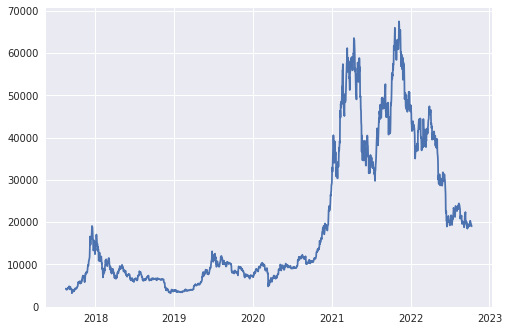

In [408]:
plt.style.use("seaborn")
plt.plot(df.index, df["close"])

In [409]:
pivot_range = int(20)

conditions1_minima = np.array([(df["close"].shift(periods = pivot_range) < df["close"].shift(periods = pivot_range + lb)) for lb in range(1, pivot_range + 1)])
conditions2_minima = np.array([(df["close"].shift(periods = pivot_range) < df["close"].shift(periods = pivot_range - lb)) for lb in range(1, pivot_range + 1)])
conditions_minima = conditions1_minima & conditions2_minima
# 1st element is if condition is true compared to first candle before,
# 2nd element is if condition is true compared to second candle before and so on ...

conditions_minima_T = np.transpose(conditions_minima)
# First element checks if 10 forward and 10 backward minimum conditions are true for 1st row, 
# Second element checks if 10 forward and 10 backward minimum conditions are true for 2nd row and so on ...

check_minima = np.all(conditions_minima_T, axis = 1)
# Test whether all array elements along a given axis evaluate to True.

df["check_minima"] = check_minima
df["check_minima"][df["check_minima"] == False] = None
df["minima"] = df["close"].shift(periods = pivot_range)[check_minima == True]

/tmp/ipykernel_444/2167954833.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["check_minima"][df["check_minima"] == False] = None


In [410]:
conditions1_maxima = np.array([(df["close"].shift(periods = pivot_range) > df["close"].shift(periods = pivot_range + lb)) for lb in range(1, pivot_range + 1)])
conditions2_maxima = np.array([(df["close"].shift(periods = pivot_range) > df["close"].shift(periods = pivot_range - lb)) for lb in range(1, pivot_range + 1)])
conditions_maxima = conditions1_maxima & conditions2_maxima

# 1st element is if condition is true compared to first candle before,
# 2nd element is if condition is true compared to second candle before and so on ...

conditions_maxima_T = np.transpose(conditions_maxima)

# First element checks if 10 forward and 10 backward maximum conditions are true for 1st row, 
# Second element checks if 10 forward and 10 backward maximum conditions are true for 2nd row and so on ...

check_maxima = np.all(conditions_maxima_T, axis = 1)
# Test whether all array elements along a given axis evaluate to True.

df["check_maxima"] = check_maxima
df["check_maxima"][df["check_maxima"] == False] = None
df["maxima"] = df["close"].shift(periods = pivot_range)[check_maxima == True]

/tmp/ipykernel_444/3487325823.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["check_maxima"][df["check_maxima"] == False] = None


In [411]:
df["maxima"][0] = df["high"][0] * 10  # an arbitrarily large value assigned to first row (to make .fillna() function work.)
df["minima"][0] = 0  # an arbitrarily small value assigned to first row (to make .fillna() function work.)

df["maxima"] = df["maxima"].fillna(method = "ffill")  # Fill NaN with last value.
df["minima"] = df["minima"].fillna(method = "ffill")  # Fill NaN with last value.

/tmp/ipykernel_444/1067409399.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["maxima"][0] = df["high"][0] * 10  # an arbitrarily large value assigned to first row (to make .fillna() function work.)
/tmp/ipykernel_444/1067409399.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["minima"][0] = 0  # an arbitrarily small value assigned to first row (to make .fillna() function work.)


In [412]:
df

,symbol,open,high,low,close,check_minima,minima,check_maxima,maxima
date,,,,,,,,,
2017-08-17,BTC/USDT,4469.93,4485.39,4200.74,4285.08,NaN,0.00,NaN,44853.90
2017-08-18,BTC/USDT,4285.08,4371.52,3938.77,4108.37,NaN,0.00,NaN,44853.90
2017-08-19,BTC/USDT,4108.37,4184.69,3850.00,4139.98,NaN,0.00,NaN,44853.90
2017-08-20,BTC/USDT,4139.98,4211.08,4032.62,4086.29,NaN,0.00,NaN,44853.90
2017-08-21,BTC/USDT,4086.29,4119.62,3911.79,4016.00,NaN,0.00,NaN,44853.90
...,...,...,...,...,...,...,...,...,...
2022-10-07,BTC/USDT,19960.67,20068.82,19320.00,19530.09,NaN,18970.79,NaN,22395.74
2022-10-08,BTC/USDT,19530.09,19627.38,19237.14,19417.96,NaN,18970.79,NaN,22395.74
2022-10-09,BTC/USDT,19416.52,19558.00,19316.04,19439.02,NaN,18970.79,NaN,22395.74


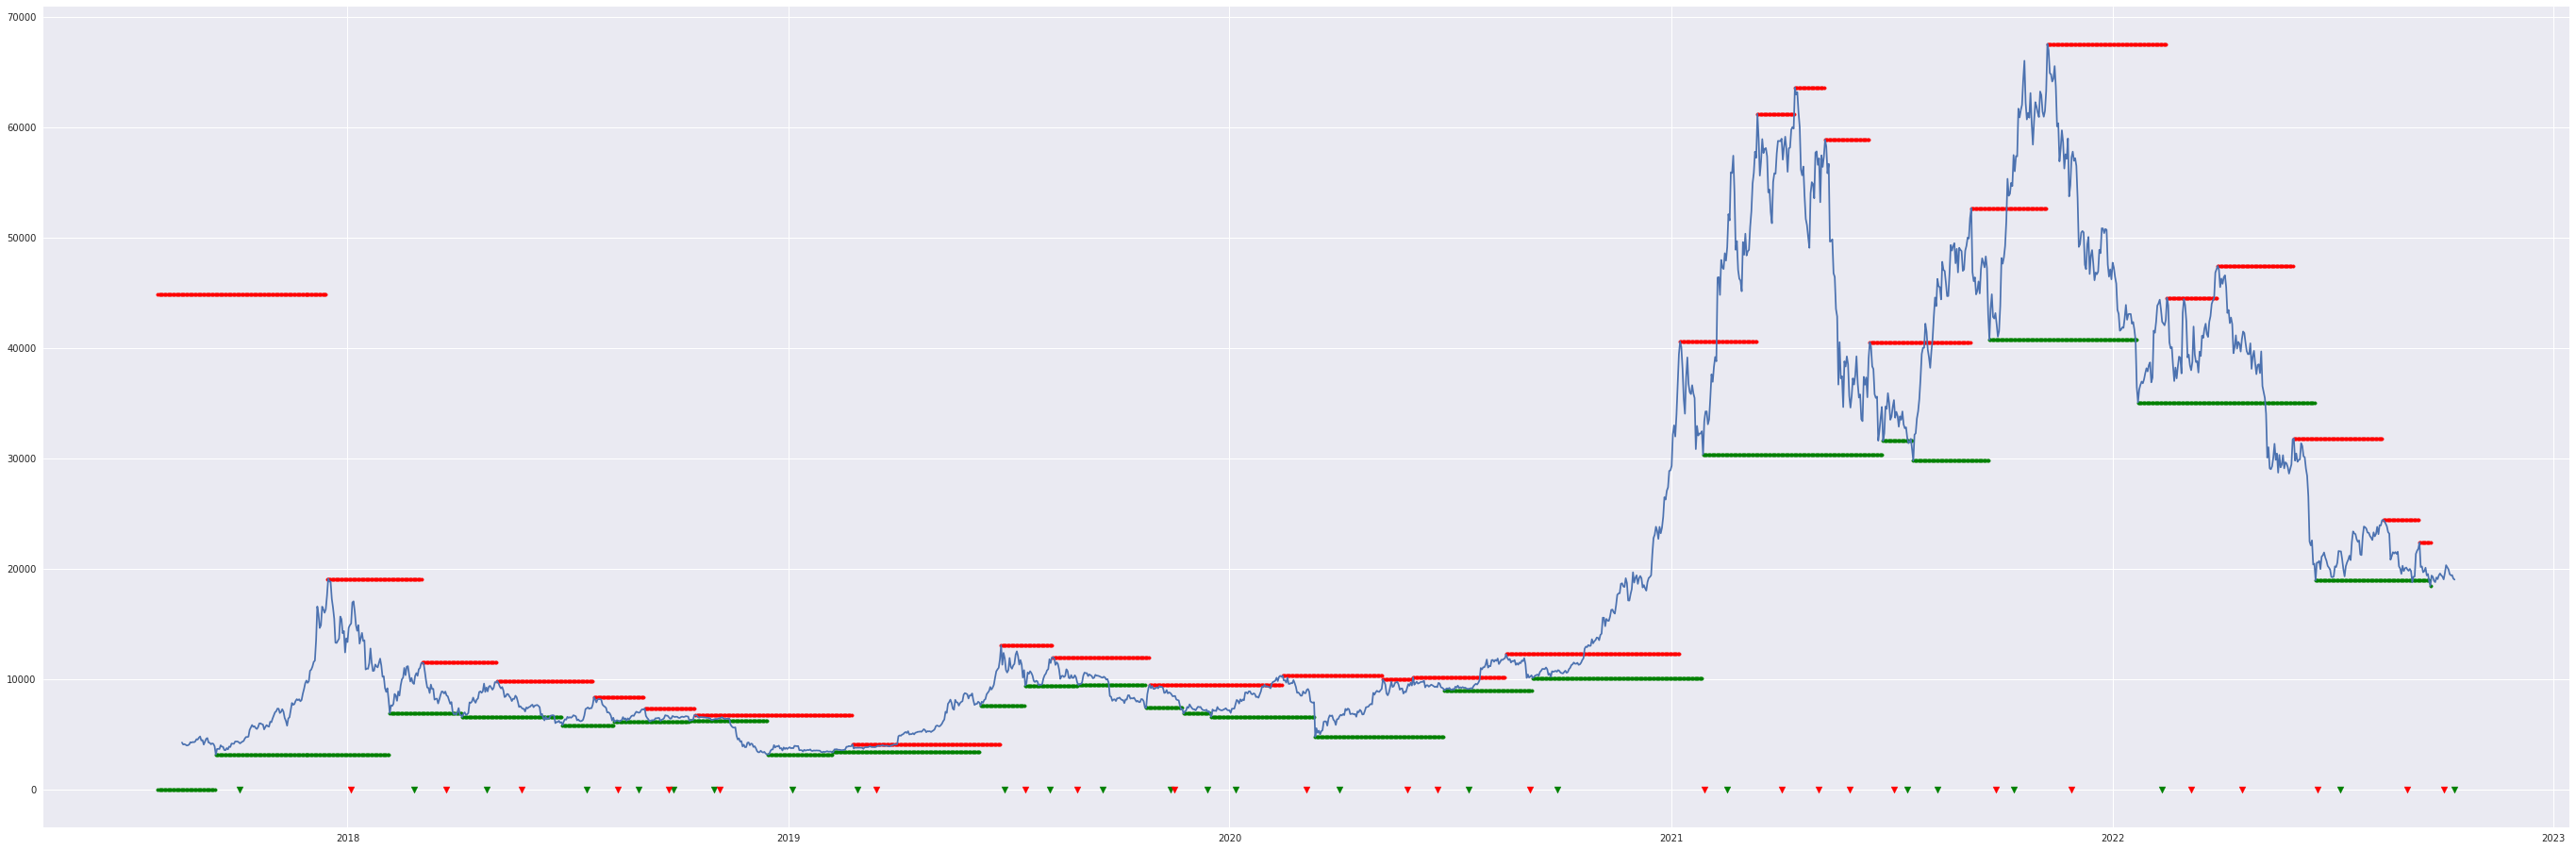

In [413]:
plt.style.use("seaborn")
plt.figure(figsize = [48, 16])
plt.plot(df.index, df["close"])
plt.scatter(df.index, df["check_minima"], c = "g", marker = "v")
plt.scatter(df.index, df["check_maxima"], c = "r", marker = "v")
plt.scatter(df.index.shift(periods = -pivot_range, freq = "D"), df["minima"], c = "g", marker = ".")
plt.scatter(df.index.shift(periods = -pivot_range, freq = "D"), df["maxima"], c = "r", marker = ".")

In [414]:
df.head()

,symbol,open,high,low,close,check_minima,minima,check_maxima,maxima
date,,,,,,,,,
2017-08-17,BTC/USDT,4469.93,4485.39,4200.74,4285.08,NaN,0.0,NaN,44853.9
2017-08-18,BTC/USDT,4285.08,4371.52,3938.77,4108.37,NaN,0.0,NaN,44853.9
2017-08-19,BTC/USDT,4108.37,4184.69,3850.00,4139.98,NaN,0.0,NaN,44853.9
2017-08-20,BTC/USDT,4139.98,4211.08,4032.62,4086.29,NaN,0.0,NaN,44853.9
2017-08-21,BTC/USDT,4086.29,4119.62,3911.79,4016.00,NaN,0.0,NaN,44853.9


In [415]:
d = {"maxima": df["maxima"], "minima": df["minima"]}
df_extrema = pd.DataFrame(data = d)
df_extrema

,maxima,minima
date,,
2017-08-17,44853.90,0.00
2017-08-18,44853.90,0.00
2017-08-19,44853.90,0.00
2017-08-20,44853.90,0.00
2017-08-21,44853.90,0.00
...,...,...
2022-10-07,22395.74,18970.79
2022-10-08,22395.74,18970.79
2022-10-09,22395.74,18970.79


In [416]:
arr_ext = df_extrema.to_numpy()
arr_ext

array([[44853.9 ,     0.  ],
       [44853.9 ,     0.  ],
       [44853.9 ,     0.  ],
       ...,
       [22395.74, 18970.79],
       [22395.74, 18970.79],
       [22395.74, 18461.36]])

In [417]:
len(arr_ext)

1883

In [418]:
ms = None  # 2 for bullish 1 for bearish market structure (ms).
ms_list = []
# Iterate over the array with a for loop
for i in range(0, len(arr_ext)):
    # Compare the current element to the previous element
    if arr_ext[i][1] > arr_ext[i - 1][1]:  # Higher low (higher minima value.)
        ms = 2  # Bullish ms.
        ms_list.append(ms)
        print("MS turned Bullish!")
        #print(ms_list)
    elif arr_ext[i][0] < arr_ext[i - 1][0]: # Lower high (lower maxima value.)
        ms = 1  # Bearish ms.
        ms_list.append(ms)
        print("MS turned Bearish!")
        #print(ms_list)
    else:
        if ms == 2:
            print("MS still bullish.")
        elif ms == 1:
            print("MS still bearish.")
        ms_list.append(ms)
        #print(ms_list)
        
print(ms_list)

MS still bearish.
MS still bearish.
MS still bearish.
MS still bearish.
MS still bearish.
MS still bearish.
MS still bearish.
MS still bearish.
MS still bearish.
MS still bearish.
MS still bearish.
MS still bearish.
MS still bearish.
MS still bearish.
MS still bearish.
MS still bearish.
MS still bearish.
MS still bearish.
MS still bearish.
MS still bearish.
MS still bearish.
MS still bearish.
MS still bearish.
MS still bearish.
MS still bearish.
MS still bearish.
MS still bearish.
MS still bearish.
MS still bearish.
MS still bearish.
MS still bearish.
MS still bearish.
MS still bearish.
MS still bearish.
MS still bearish.
MS still bearish.
MS still bearish.
MS still bearish.
MS still bearish.
MS still bearish.
MS still bearish.
MS still bearish.
MS still bearish.
MS still bearish.
MS still bearish.
MS still bearish.
MS still bearish.
MS still bearish.
MS turned Bullish!
MS still bullish.
MS still bullish.
MS still bullish.
MS still bullish.
MS still bullish.
MS still bullish.
MS still 

In [419]:
len(ms_list)

1883

In [420]:
df["market_structure"] = ms_list
df

,symbol,open,high,low,close,check_minima,minima,check_maxima,maxima,market_structure
date,,,,,,,,,,
2017-08-17,BTC/USDT,4469.93,4485.39,4200.74,4285.08,NaN,0.00,NaN,44853.90,1
2017-08-18,BTC/USDT,4285.08,4371.52,3938.77,4108.37,NaN,0.00,NaN,44853.90,1
2017-08-19,BTC/USDT,4108.37,4184.69,3850.00,4139.98,NaN,0.00,NaN,44853.90,1
2017-08-20,BTC/USDT,4139.98,4211.08,4032.62,4086.29,NaN,0.00,NaN,44853.90,1
2017-08-21,BTC/USDT,4086.29,4119.62,3911.79,4016.00,NaN,0.00,NaN,44853.90,1
...,...,...,...,...,...,...,...,...,...,...
2022-10-07,BTC/USDT,19960.67,20068.82,19320.00,19530.09,NaN,18970.79,NaN,22395.74,1
2022-10-08,BTC/USDT,19530.09,19627.38,19237.14,19417.96,NaN,18970.79,NaN,22395.74,1
2022-10-09,BTC/USDT,19416.52,19558.00,19316.04,19439.02,NaN,18970.79,NaN,22395.74,1


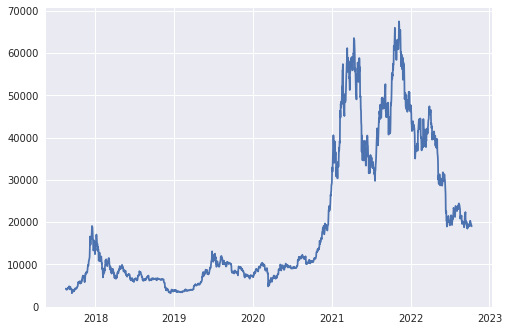

In [421]:
plt.plot(df.index, df["close"])

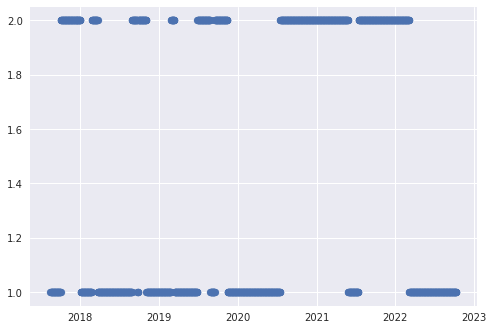

In [422]:
plt.scatter(df.index, df["market_structure"])